# Hair Products Factory - Linear Optimization Problem

------------------------------------------------------
*Author: Nerea Luna Picón*

------------------------------------------------------

# Introduction

This notebook formulates a linear optimization problem (not realistic in this case).

The context takes place in a factory in Madrid, which produces ten hair treatment products: regular shampoo, exclusive shampoo, conditioner, hair colour spray, hair mask, hairspray, hair gel, exfoliant, hair cream and fair foam. They use some basic chemicals, A, B, C and D, in specified proportions, and we also know the amount of liters we have in stock. With all this information, we would like to build a model that help us determining the amount products (of each type) that needs to be sold so that the company gets the maximum profit from it.

Details about each hair product is shown in the table below:  



# Ratio of basic chemicals used for hair treatment products


 Raw materials      | Shampoo | Exclusive shampoo | Conditioner | Hair color spray | Hair mask | Hair spray | Hair gel | Exfoliant | Hair cream | Hair foam | Quantity in stock (liters)
  --------------|-----|------|------|------|----|----|----|-----|----|----|-------|
 A  | 0.3 | 0.5 | 0.0 | 0.6 | 0.4 | 0.4 | 0.3 | 0.1 | 0.3 | 0.3 | 250
 B  | 0.5 | 0.3 | 0.2 | 0.0 | 0.2 | 0.1 | 0.1 | 0.3 | 0.2 | 0.4 | 175
 C  | 0.1 | 0.2 | 0.6 | 0.0 | 0.3 | 0.3 | 0.5 | 0.4 | 0.4 | 0.1 | 200
 D  | 0.1 | 0.0 | 0.2 | 0.4 | 0.1 | 0.2 | 0.1 | 0.2 | 0.1 | 0.2 | 150



 
 Profit values of the products in '€/liter'
 -------------------------------------------------------------------------------------------------------------------------

 
 Shampoo | Exclusive shampoo | Conditioner | Hair color spray | Hair mask | Hair spray | Hair gel | Exfoliant | Hair cream | Hair foam
 -----|------|------|------|----|----|----|-----|----|----
 1.5 | 2.0 | 2.5 | 4.5 | 3.5 | 3.0 | 2.0 | 3.5 | 2.0 | 2.5  
 




- Decision variables:


   ($x_i$ = number of liters of each product $i$ that are sold by the factory in one month)
   
   $x_S$ = number of liters of Shampoo
   
   $x_{ES}$ = number of liters of Exclusive Shampoo
   
   $x_C$ = number of liters of Conditioner
   
   $x_{HCS}$ = number of liters of Hair Color Spray
   
   $x_{HM}$ = number of liters of Hair Mask
   
   $x_{HS}$ = number of liters of Hair Spray
   
   $x_{HG}$ = number of liters of Hair Gel
   
   $x_{EX}$ = number of liters of Exfoliant
   
   $x_{HC}$ = number of liters of Hair Cream
   
   $x_{HF}$ = number of liters of Hair Foam



# General Formulation

\begin{equation}
\begin{matrix}
\displaystyle \max_x & \displaystyle \sum_{j=1}^{m} c_j x_j \\
\textrm{s.t.} & \displaystyle \sum_{j=1}^{m} A_{ij} x_j & \leq & p_i & & \forall i = 1,\dots,k_l \\
& \displaystyle \sum_{j=1}^{m} R_{ij} x_j & \geq & d_i & & \forall i = 1,\dots,k_g\\
& x_j \in \mathbb{R}^{+},
\end{matrix}
\end{equation}


where $k = k_l + k_g$ is the total number of constraints in the problem, and $c_j, A_{ij}, R_{ij}, p_i$ and $d_i, \hspace{0.12cm} \forall i = 1,\dots,n, \forall j = 1,\dots,m,$ are problem parameters. 

Following the general formulation of a linear optimization model, our problem can be expressed as:

\begin{equation*}
\begin{matrix}
\displaystyle \max_x & 1'5x_S+2x_{ES}+2'5x_C+4'5x_{HCS}+3'5x_{HM}+3x_{HS}+2x_{HG}+3'5x_{EX}+2x_{HC}+2'5x_{HF} \\
\textrm{s.t.} & 0'3x_S+0'5x_{ES}+0'6x_{HCS}+0'4x_{HM}+0'4x_{HS}+0'3x_{HG}+0'1x_{EX}+0'3x_{HC}+0'3x_{HF} & \leq & 250  \\
&0'5x_S+0'3x_{ES}+0'2x_C+0'2x_{HM}+0'1x_{HS}+0'1x_{HG}+0'3x_{EX}+0'2x_{HC}+0'4x_{HF} & \leq & 175  \\
&0'1x_S+0'2x_{ES}+0'6x_C+0'3x_{HM}+0'3x_{HS}+0'5x_{HG}+0'4x_{EX}+0'4x_{HC}+0'1x_{HF} & \leq & 200  \\
&0'1x_S+0'2x_C+0'4x_{HCS}+0'1x_{HM}+0'2x_{HS}+0'1x_{HG}+0'2x_{EX}+0'1x_{HC}+0'2x_{HF} & \leq & 150  \\
& x_S+x_{ES}+x_C+x_{HCS}+x_{HM}+x_{HS}+x_{HG}+x_{EX}+x_{HC}+x_{HF} & \geq & 250 \\
& x_{ES} \geq 30 \\
& x_{HCS} \geq 15 \\
& x_{S} \geq x_{ES} \\
& x_j \geq 0 \hspace{0.2cm}  \forall j \in J \\
\end{matrix}
\end{equation*}

where $x_j$ is the number of liters of each hair product $j$ sold by the factory in one month, the total number of constraints is $k = 4 + 4 = 8$, $c_j$ is a vector containing the unit price of each of the products, $A_{ij}$ a matrix containing the proportion of basic chemicals used for each hair product, $R_{ij}$ another matrix created for lower limit constraints, $p_i$ a vector containing the upper bounds of production and $d_i$ a vector with lower bounds of production due to some demands of the factory.

Our goal is, consequently, maximizing the factory's profit obtained from the production of these hair treatment products, according to the established restrictions.

In [1]:
%%writefile hair_prod.dat

#################################
#  Author: Nerea Luna Picón     #
#################################

# The problem will be defined in AMLP (A Mathematical Programming Language),
# a way for representing linear programming problems in algebraic notation

# Next, we show the set of specific parameters that have been used for checking the feasibility of the problem:

# Number of raw materials
param n := 4
;
# Number of products
param m := 10
;
 
# Ratio of the basic chemicals each hair treatment product requires
# The following matrix is composed of 4 rows (one per raw material) and 10 columns (one per each hair product)
param a : 1 2 3 4 5 6 7 8 9 10 := 
1 0.3 0.5 0.0 0.6 0.4 0.4 0.3 0.1 0.3 0.3
2 0.5 0.3 0.2 0.0 0.2 0.1 0.1 0.3 0.2 0.4
3 0.1 0.2 0.6 0.0 0.3 0.3 0.5 0.4 0.4 0.1
4 0.1 0.0 0.2 0.4 0.1 0.2 0.1 0.2 0.1 0.2
;

# Unit price ($/liter) of each hair treatment product
param c := 
1 1.5
2 2
3 2.5
4 4.5
5 3.5
6 3
7 2
8 3.5
9 2
10 2.5
;

# Maximum production (quantity in stock in liters) of each raw material
param P_max := 
1 250
2 175
3 200
4 150
;  

# Additional matrix needed for expressing some specific constraints in the problem
param r : 1 2 3 4 5 6 7 8 9 10 := 
1 0.0 0.0 0.0 1 0.0 0.0 0.0 0.0 0.0 0.0              # model.x[4] >= 15
2 1 -1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0               # model.x[1] >= model.x[2] (same as model.x[1] - model.x[2] >= 0)
3 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0            # model.x[2] >= 30
4 1 1 1 1 1 1 1 1 1 1                                # x[1] + x[2] +....+ x[10] >= 250
;

# Some lower-bounds needed for setting some constraints due to the factory's demands 
param d :=
1 15          # model.x[4] >= 15
2 0           # model.x[1] >= model.x[2] (same as model.x[1] - model.x[2] >= 0)
3 30          # model.x[2] >= 30
4 250         # x[1] + x[2] +....+ x[10] >= 250
;

Overwriting hair_prod.dat


In [2]:
# Imports -> GLKP solver will be used
from pyomo.environ import *
from pyomo.opt import SolverFactory
opt = SolverFactory("glpk")


# We will make use of an abstract model, since we will input different data values at the time a solution is to be obtained,
# so that we can define our problem as general as possible
model = AbstractModel()


                        ########################## Model parameters A) #########################
    
model.n = Param(within=NonNegativeIntegers) # n -> number of raw materials (4)
model.m = Param(within=NonNegativeIntegers) # m -> number of hair treatment products (10)


                        ############################# Model sets ############################# 
    
model.I = RangeSet(1,model.n) # range with starting point at 'i=1' and ending in 'i=n'
model.J = RangeSet(1,model.m) # range with starting point at 'j=1' and ending in 'j=m'


                        ########################## Model parameters B) #########################
# Cost vector
model.c = Param(model.J, within=PositiveReals)

# Matrix defining the amount of raw materials each product requires (these correspond with the ratios from the first table)
model.a = Param(model.I, model.J, within=NonNegativeReals)

# Upper bound for each raw material
model.P_max = Param(model.I, within=NonNegativeReals)

# Additional matrix used to fulfill the constraints specified at the beginning of the notebook
model.r = Param(model.I, model.J) # its dimension is 4x10

# Vector of resources/constants
model.d = Param(model.I, within=NonNegativeReals)


                        ######################### Decision variables #########################  
    
# With this definition, we are implicitly specifying that x_i >= 0 for all i
# 'model.J' takes values from [1-m] as already explained. Hence, 'model.x' contains 10 values 
model.x = Var(model.J, domain=NonNegativeReals) 


                        ######################### Objective function ######################### 


# As specified in the general formulation, our target is maximizing the profit as long as hair products are sold
# We just need to multiply each product unit price by the amount of items sold of each type and sum them all up
def obj_expression(model): 
    return sum(model.c[j]*model.x[j] for j in model.J) 
model.OBJ = Objective(rule=obj_expression, sense=maximize)


                        ############################# Constraints ############################# 

# Upper limit of hair products ('<=')
# The following function is applicable for the four first constraints 
# We need to set some upper bound to our problem, since we have some fixed amounts of raw materials regarding the production 
# of these 10 products. Therefore, for each raw material (each row), we just need to multiply each value (ratio)
# of the matrix 'a' (also called matrix of technological coefficients), by each of the products and impossing that upper bound 
# constant 'P_max' with the '<=' expression.
# We repeat this product-sum-based operation for every value of 'i' (from row 1 until row 4)
def production_rule(model, i):
    value = sum(model.a[i,j]*model.x[j] for j in model.J)
    return value <= model.P_max[i]
model.production_uplimit = Constraint(model.I, rule=production_rule)



# Lower constraints ('>='):

 # 1) model.x[4] >= 15
    # We only needed the 'hair color spray'(4th product) to be larger than 15. For that reason, we only set to '1' the position
    # corresponding to that product in the first row of the matrix 'r' (remaining positions are set to '0') 
    
 # 2) model.x[1] >= model.x[2] (same as model.x[1] - model.x[2] >= 0)
    # In the same way, we proceeded placing 1's and 0's values to the second row. Here, we needed a '1' 
    # in the first position and a '-1' in the second, since on the left hand side of the inequation we had a subtraction

 # 3) model.x[2] >= 30
    # This is the same as constraint 1) but setting value '1' to the second position in third row instead
    
 # 4) x[1] + x[2] +....+ x[10] >= 250
    # To finish, this last constraint requires every variable to be active, that is why we set a '1' to all the positions
    # of the last row

# Constants required in these constraints (right hand side of each one) correspond to vector 'd' (defined in previous cell)   
# The following function has been re-used for the already explained four constraints:
def pconst_rule(model, i):
    value = sum(model.r[i,j]*model.x[j] for j in model.J)
    return value >= model.d[i]
model.pconst = Constraint(model.I, rule=pconst_rule)

In [3]:
!pyomo solve hair_problem.py hair_prod.dat --solver=glpk --summary --solver-suffix=dual

[    0.00] Setting up Pyomo environment
[    0.00] Applying Pyomo preprocessing actions
[    0.09] Creating model
[    0.18] Applying solver
[    0.37] Processing results
    Number of solutions: 1
    Solution Information
      Gap: 0.0
      Status: feasible
      Function Value: 2718.59375
    Solver results file: results.yml

Solution Summary

Model unknown

  Variables:
    x : Size=10, Index=J
        Key : Lower : Value    : Upper : Fixed : Stale : Domain
          1 :     0 :     30.0 :  None : False : False : NonNegativeReals
          2 :     0 :     30.0 :  None : False : False : NonNegativeReals
          3 :     0 :      0.0 :  None : False : False : NonNegativeReals
          4 :     0 : 160.3125 :  None : False : False : NonNegativeReals
          5 :     0 :    252.5 :  None : False : False : NonNegativeReals
          6 :     0 :      0.0 :  None : False : False : NonNegativeReals
          7 :     0 :      0.0 :  None : False : False : NonNegativeReals
          8 :  

In [4]:
!type results.yml

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 2718.59375
  Upper bound: 2718.59375
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 11
  Number of nonzeros: 51
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.14435219764709473
# ----------------------------------------------------------
#   Solution Information
# -------------------------

In [5]:
instance = model.create_instance('hair_prod.dat')
instance.pprint()
print('\n'"=======================================================================================")
results = opt.solve(instance)
print(results)

2 Set Declarations
    a_index : Dim=0, Dimen=2, Size=40, Domain=None, Ordered=True, Bounds=None
        Virtual
    r_index : Dim=0, Dimen=2, Size=40, Domain=None, Ordered=True, Bounds=None
        Virtual

2 RangeSet Declarations
    I : Dim=0, Dimen=1, Size=4, Domain=Integers, Ordered=True, Bounds=(1, 4)
        Virtual
    J : Dim=0, Dimen=1, Size=10, Domain=Integers, Ordered=True, Bounds=(1, 10)
        Virtual

7 Param Declarations
    P_max : Size=4, Index=I, Domain=NonNegativeReals, Default=None, Mutable=False
        Key : Value
          1 :   250
          2 :   175
          3 :   200
          4 :   150
    a : Size=40, Index=a_index, Domain=NonNegativeReals, Default=None, Mutable=False
        Key     : Value
         (1, 1) :   0.3
         (1, 2) :   0.5
         (1, 3) :   0.0
         (1, 4) :   0.6
         (1, 5) :   0.4
         (1, 6) :   0.4
         (1, 7) :   0.3
         (1, 8) :   0.1
         (1, 9) :   0.3
        (1, 10) :   0.3
         (2, 1) :   0.5
   

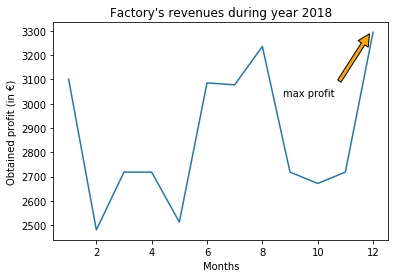

In [6]:
# Some graphical representation of the problem
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# x-axis
months = np.arange(1,13,1)

# y-axis
values_OF = [3100.59375,2480.7142,2718.59375,2718.59375,2512.8571,3085.71875,3077.71875,3235.71875,2718.59375,2671.875,2718.59375,3294.1071]

plt.plot(months,values_OF, linestyle='solid')

plt.title('Factory\'s revenues during year 2018')
plt.xlabel('Months')
plt.ylabel('Obtained profit (in €)')

plt.annotate('max profit', xy=(12, 3310), xytext=(8.75, 3030),
            arrowprops=dict(facecolor='orange', shrink=0.09),
            )
plt.show()

From the previous graph, we can have a rough idea of the factory's revenues during year 2018. For getting the mensual profit data, the problem is solved 12 times (changing by hand the values of the unit costs of the products according to the period of the year).

Above, we can identify a non-constant function, since unit costs have varied along the year. For instance, we can observe how during Christmas period (December and January months), profits are higher since the company expects selling more and prices go up. The same happens during summer months, after some studies, it has been observed that people buy more hair products in those periods for protecting the hair from sun and water, that is why prices increase and so profit does.